# Customer Segmentation Analysis for E-Commerce Company

In [6]:
# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Make plots look nice
sns.set(style='whitegrid')

In [8]:
# 📌 Step 2: Load Dataset
df = pd.read_csv('ifood_df.csv')

# Preview the data
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education

In [10]:
# 📌 Step 3: Explore Data Structure
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  Accept

In [12]:
# 📌 Step 4: Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.1304

In [16]:
# 📌 Step 5: Feature Engineering
# Create new feature for total money spent
df['TotalSpent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


In [18]:
# 📌 Step 6: Feature Selection
features = ['Income', 'Recency', 'TotalSpent', 'NumWebPurchases', 'NumCatalogPurchases']
X = df[features]


In [20]:
# 📌 Step 7: Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\parsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\parsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\parsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\parsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

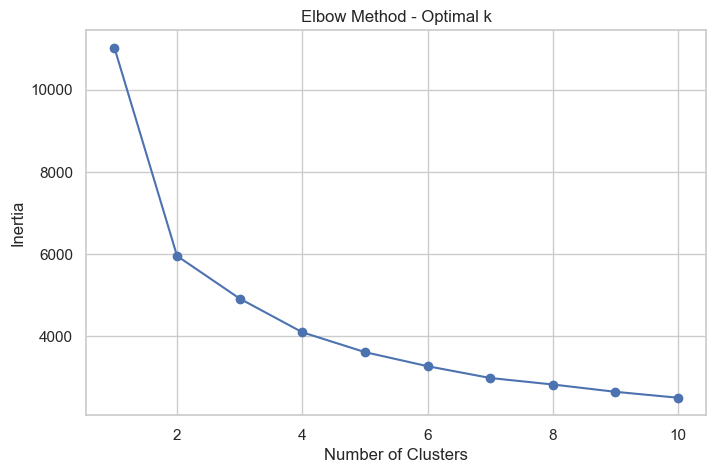

In [22]:
# 📌 Step 8: Elbow Method for Optimal Clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [24]:
# 📌 Step 9: Apply K-Means with Chosen k
optimal_k = 3  # <- Adjust based on the elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


C:\Users\parsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


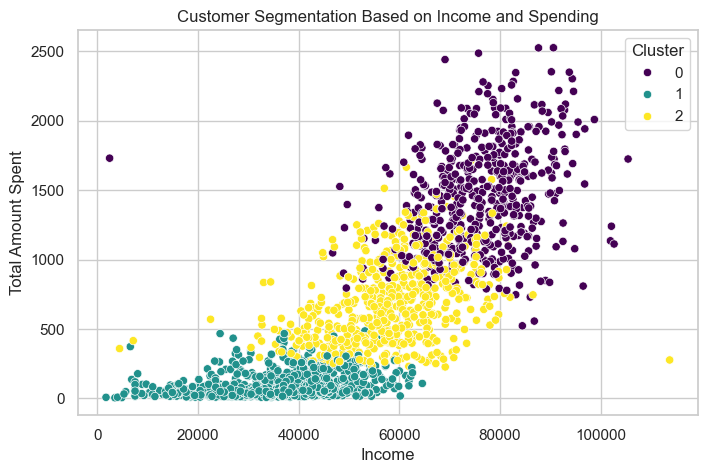

In [26]:
# 📌 Step 10: Visualize the Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Income', y='TotalSpent', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation Based on Income and Spending')
plt.xlabel('Income')
plt.ylabel('Total Amount Spent')
plt.show()

In [28]:
# 📌 Step 11: Analyze Cluster Characteristics
print("\nCluster Summary:")
print(df.groupby('Cluster')[features + ['TotalSpent']].mean())


Cluster Summary:
               Income    Recency   TotalSpent  NumWebPurchases  \
Cluster                                                          
0        75829.510601  51.975265  1435.162544         5.226148   
1        33990.572134  49.458498    95.472332         2.028656   
2        58227.682616  45.606061   684.405104         6.429027   

         NumCatalogPurchases   TotalSpent  
Cluster                                    
0                   6.386926  1435.162544  
1                   0.542490    95.472332  
2                   2.661882   684.405104  


In [30]:
# 📌 Step 12: Recommendations
print("\nBusiness Recommendations:")
print("1. Target high-value customers with exclusive loyalty rewards.")
print("2. Design special promotions for low-spending segments to increase their engagement.")
print("3. Use digital campaigns to convert high web activity segments into actual purchases.")



Business Recommendations:
1. Target high-value customers with exclusive loyalty rewards.
2. Design special promotions for low-spending segments to increase their engagement.
3. Use digital campaigns to convert high web activity segments into actual purchases.
